#### BigMart Sales Prediction!
##### Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [1]:
# Import all necessary libraries
import pandas as pd
import math
import pickle
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [3]:
# Read CSV files 
train = pd.read_csv('files//train.csv')
test = pd.read_csv('files//test.csv')

In [4]:
# display dataframe info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.shape

(8523, 12)

In [7]:
test.shape

(5681, 11)

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
df = train.copy()

#### Hypothesis to check for contribution of sales:

1. Item fat content contributing to higher sales?
2. Item type/category contributing to sales?
3. Item visibility in the outlet contribute to sales?
4. Item MRP price higher/lower contribute to sales?
5. Is outlet age contribute to sales?
6. Is outlet location in tier1/tier2 cities contribute to sales?
7. Is outlet size contribute to sales?


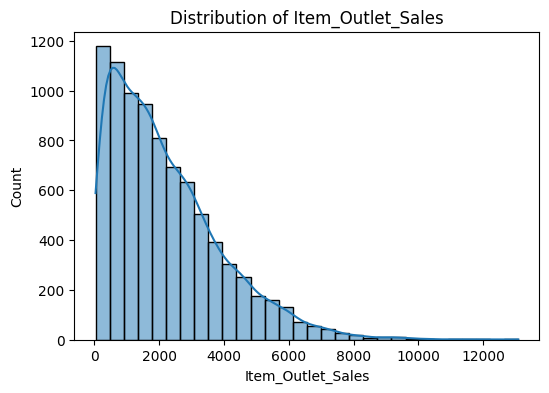

In [13]:
col = 'Item_Outlet_Sales'
plt.figure(figsize=(6, 4))
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')
plt.show()

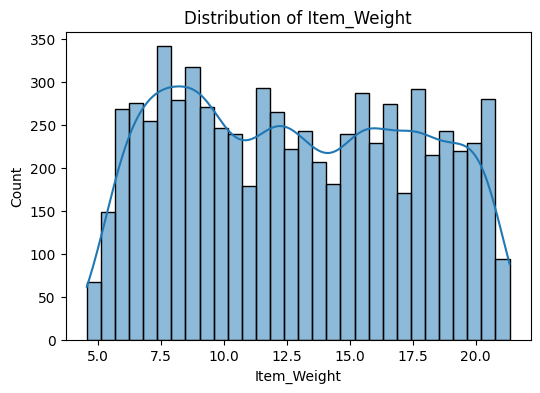

In [14]:
col = 'Item_Weight'
plt.figure(figsize=(6, 4))
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')
plt.show()

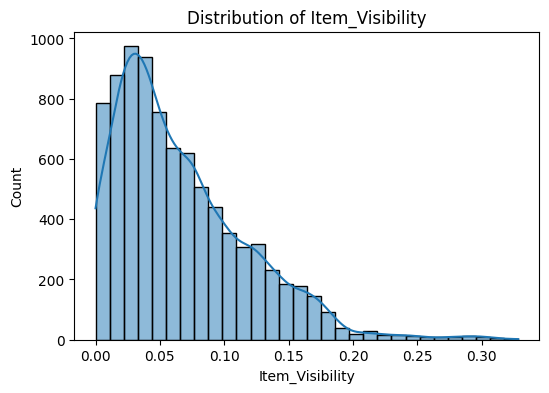

In [15]:
col = 'Item_Visibility'
plt.figure(figsize=(6, 4))
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')
plt.show()

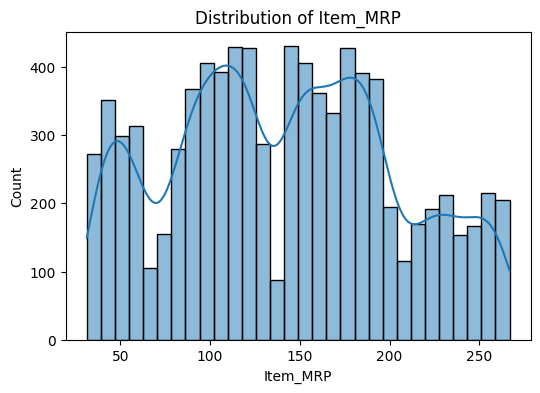

In [16]:
col = 'Item_MRP'
plt.figure(figsize=(6, 4))
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')
plt.show()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

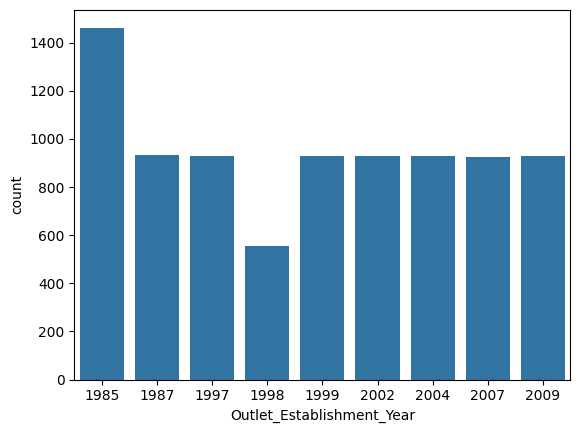

In [17]:
sns.countplot(x='Outlet_Establishment_Year', data=df)

In [18]:
t = pd.DataFrame(df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().sort_values(ascending=False),columns =['Item_Outlet_Sales'])
t

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,3.633620e+06
2004,2.268123e+06
1999,2.183970e+06
2007,2.167465e+06
1987,2.142664e+06
1997,2.118395e+06
2002,2.036725e+06
2009,1.851823e+06
1998,1.883402e+05


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

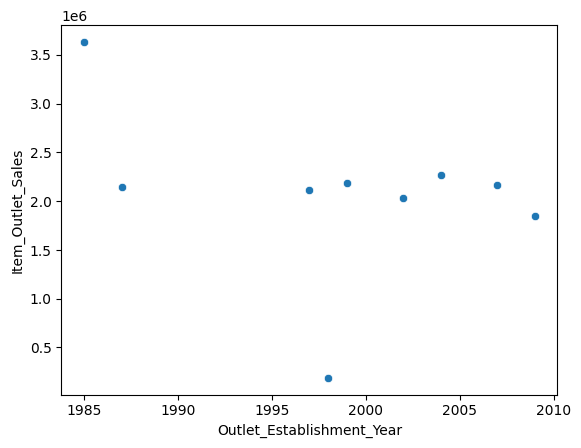

In [19]:
sns.scatterplot(data=t, x="Outlet_Establishment_Year", y="Item_Outlet_Sales")

In [20]:
t = pd.DataFrame(df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False),columns =['Item_Outlet_Sales'])
t

,Item_Outlet_Sales
Item_Type,
Fruits and Vegetables,2.820060e+06
Snack Foods,2.732786e+06
Household,2.055494e+06
Frozen Foods,1.825735e+06
Dairy,1.522594e+06
Canned,1.444151e+06
Baking Goods,1.265525e+06
Health and Hygiene,1.045200e+06
Meat,9.175656e+05


<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

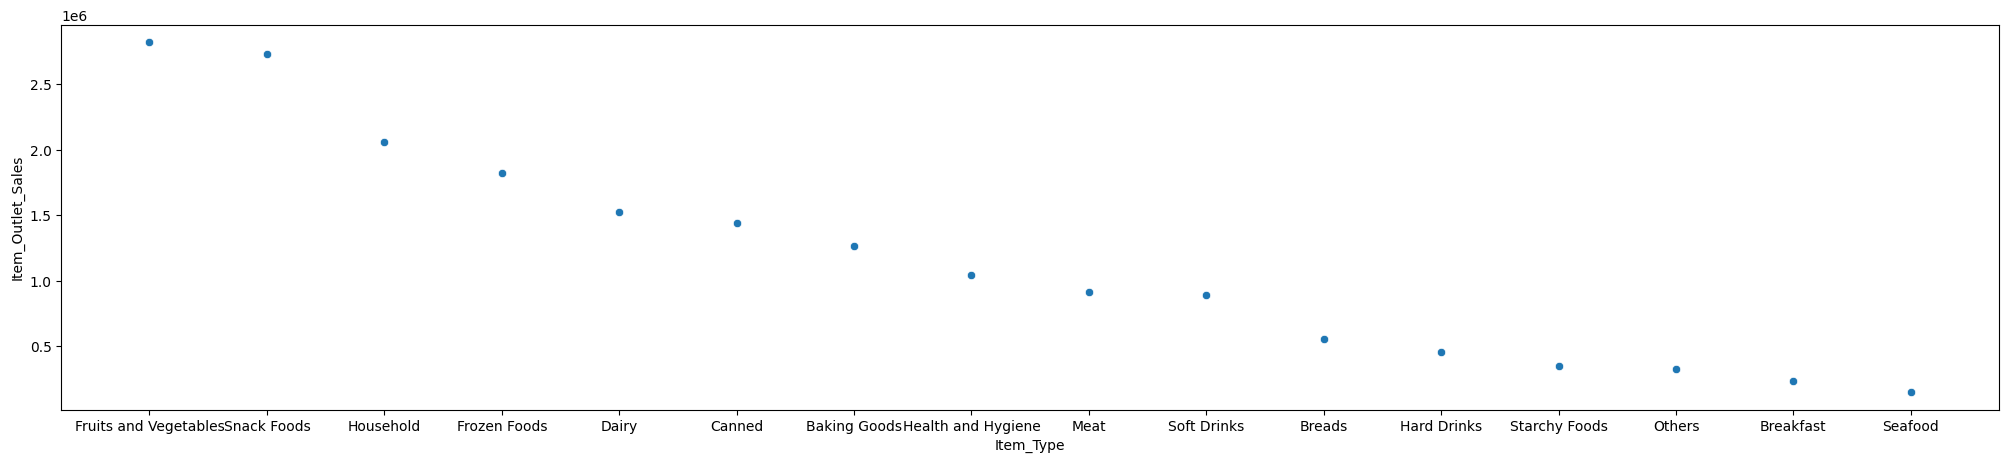

In [21]:
plt.figure(figsize=(25, 5))
sns.scatterplot(data=t, x="Item_Type", y="Item_Outlet_Sales")

<Axes: xlabel='Outlet_Size', ylabel='count'>

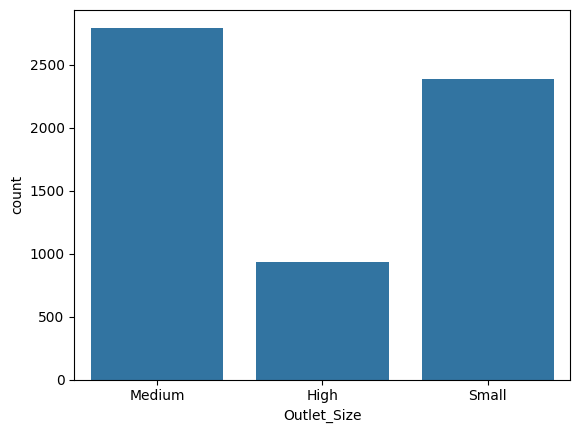

In [22]:
sns.countplot(x='Outlet_Size', data=df)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

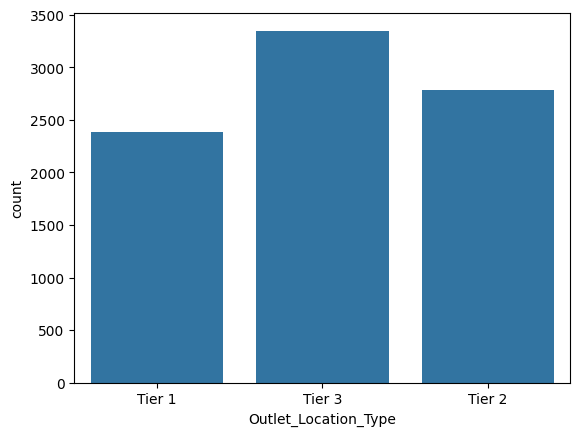

In [23]:
sns.countplot(x='Outlet_Location_Type', data=df)

<Axes: xlabel='Outlet_Type', ylabel='count'>

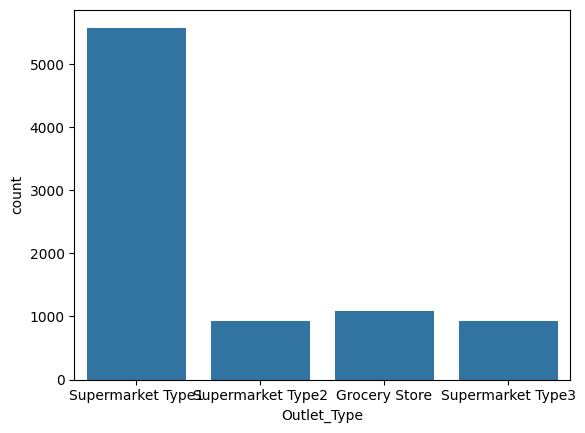

In [24]:
sns.countplot(x='Outlet_Type', data=df)

In [25]:
# Data cleaning and preprocessing
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)


df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

C:\Users\Sarath\AppData\Local\Temp\ipykernel_13740\1515620594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
C:\Users\Sarath\AppData\Local\Temp\ipykernel_13740\1515620594.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [26]:
reference_year = 2013  # This dataset is from 2013

# Calculate outlet age
df['Outlet_Age'] = reference_year - df['Outlet_Establishment_Year']

In [27]:
categorical_cols = df.select_dtypes(include=['object','category']).columns
le = LabelEncoder()
df[categorical_cols]= df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [28]:
corr_matrix = df.corr()
corr_matrix

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
Item_Identifier,1.000000,0.048290,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869,0.012772
Item_Weight,0.048290,1.000000,-0.026807,-0.009187,0.035697,0.025986,-0.007592,-0.013383,-0.004308,0.002926,0.000507,0.013162,0.013383
Item_Fat_Content,-0.114660,-0.026807,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719,-0.003151
Item_Visibility,-0.025482,-0.009187,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625,0.074834
Item_Type,-0.017973,0.035697,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048,-0.004970
Item_MRP,0.012853,0.025986,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574,-0.005020
Outlet_Identifier,-0.008602,-0.007592,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325,-0.079035
Outlet_Establishment_Year,-0.012772,-0.013383,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135,-1.000000
Outlet_Size,0.001389,-0.004308,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182,-0.193389
Outlet_Location_Type,0.003656,0.002926,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367,0.089216


<Axes: >

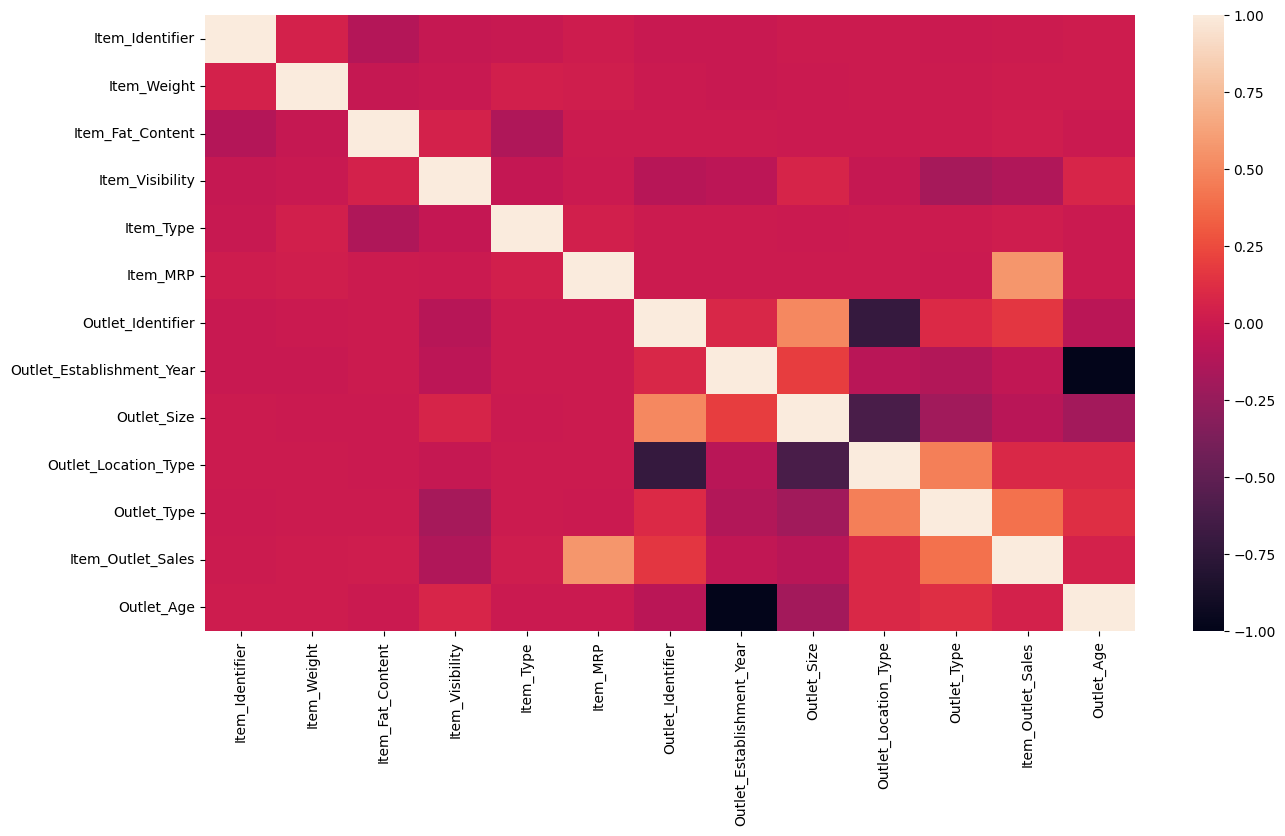

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix)

In [30]:
def serialize_model(model, identifier):
    filename = f'model_{identifier}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("✅ Model saved as model.pkl")

In [31]:
def metrics(df, y_pred, y_test,X_test,model):
    n=len(df)
    mse = mean_squared_error(y_test,y_pred)
    rmse = math.sqrt(mean_squared_error(y_test,y_pred))
    if model!='xgb':
        score = model.score(X_test,y_test)
        print("R2 Value is:",score) 
    rse = math.sqrt(n*mse/(n-2))
    
    print("RMSE score:",rmse)
    print("RSE - Residual Standard Error:",rse)
    

In [32]:
X = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state =42)

In [34]:
# Using SkLearn Linear Regression model
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = linear.predict(X_test)

In [36]:
metrics(df, y_pred, y_test, X_test, linear)

R2 Value is: 0.5101459134863147
RMSE score: 1171.7196311613318
RSE - Residual Standard Error: 1171.8571327320874


In [37]:
tree = RandomForestRegressor(oob_score=True)
tree.fit(X_train,y_train)

RandomForestRegressor(oob_score=True)

In [38]:
y_pred = tree.predict(X_test)

In [39]:
metrics(df, y_pred, y_test, X_test, tree)

R2 Value is: 0.5586286183682372
RMSE score: 1112.2244133632978
RSE - Residual Standard Error: 1112.354933156432


In [40]:
print(tree.oob_score_)

0.5422246002961209


In [41]:
feature_labels = X.columns
# Print the name and gini importance of each feature
for feature in zip(feature_labels, tree.feature_importances_):
    print(feature)

('Item_Identifier', 0.06309583821936542)
('Item_Weight', 0.06553560040374624)
('Item_Fat_Content', 0.007475217213640292)
('Item_Visibility', 0.08212951340474621)
('Item_Type', 0.03263312221798406)
('Item_MRP', 0.42949933343889884)
('Outlet_Identifier', 0.015792531117068236)
('Outlet_Establishment_Year', 0.0280617932813887)
('Outlet_Size', 0.007875947697601329)
('Outlet_Location_Type', 0.005544582343208761)
('Outlet_Type', 0.22248818002509377)
('Outlet_Age', 0.03986834063725809)


In [42]:
identifier = 'tree'
serialize_model(tree, identifier)

✅ Model saved as model.pkl


In [43]:
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0.01,
    colsample_bytree=1.0,
    random_state=42
)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


Feature Importance (by weight): {'Item_Identifier': 232.0, 'Item_Weight': 269.0, 'Item_Fat_Content': 25.0, 'Item_Visibility': 200.0, 'Item_Type': 50.0, 'Item_MRP': 1360.0, 'Outlet_Identifier': 80.0, 'Outlet_Establishment_Year': 294.0, 'Outlet_Size': 14.0, 'Outlet_Location_Type': 7.0, 'Outlet_Type': 873.0}


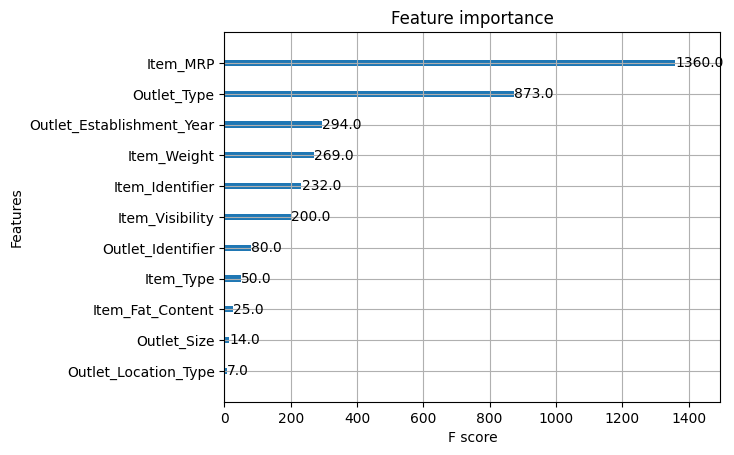

In [44]:
#  Get importance values 
importance_dict = model.get_booster().get_score(importance_type='weight')
print("Feature Importance (by weight):", importance_dict)

# Plot using built-in function 

xgb.plot_importance(model, importance_type='weight')
plt.show()

In [45]:
metrics(df, y_pred, y_test, X_test,'xgb')

RMSE score: 1055.4374630832158
RSE - Residual Standard Error: 1055.5613189145504


In [46]:
identifier = 'xgb'
serialize_model(tree, identifier)

✅ Model saved as model.pkl
